### lecture 1 - distribution plots

In [1]:
import seaborn as sns

In [4]:
tips = sns.load_dataset('tips')

In [6]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### histogram

<Axes: xlabel='total_bill', ylabel='Count'>

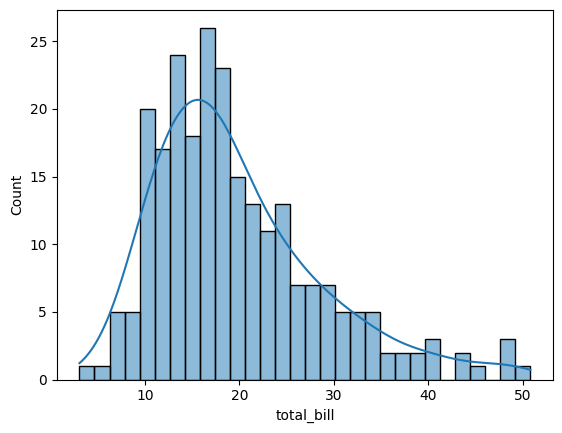

In [16]:
# with bins we can get a more defined histogram
sns.histplot(tips['total_bill'], kde=True, bins=30) 

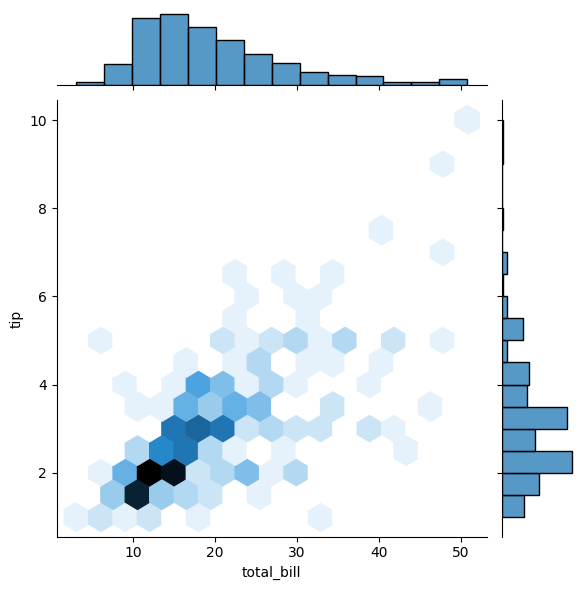

In [19]:
# we can conbine two distribution plots with 'joinplot'
# hex allows us to make an hexagon distribution rappresentation
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex') 

we can see from the join plot above that as you total bill gets higher also the tip gets higher since tip are proportional to the bill

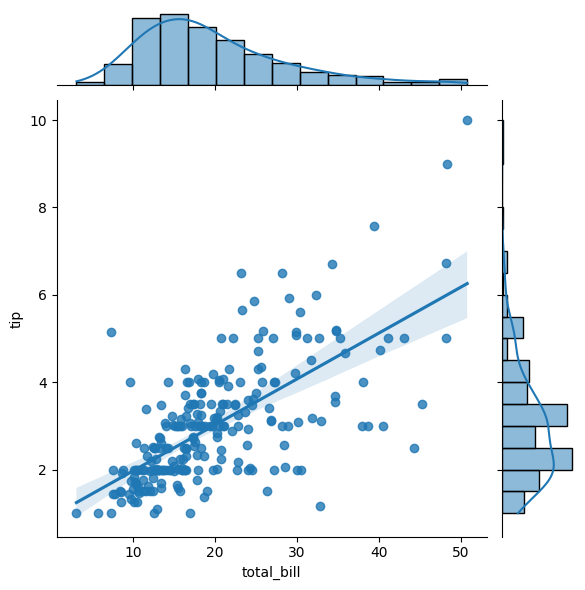

In [ ]:
# linear fit to the scattar linear data
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg') 

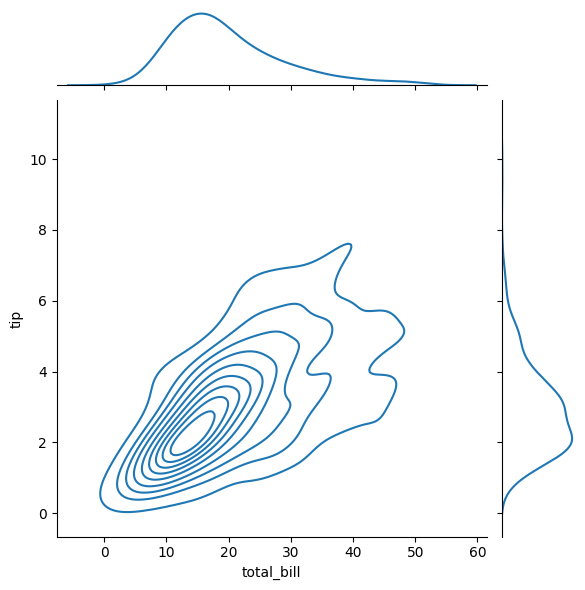

In [22]:
# density of where these points match the most
sns.jointplot(x='total_bill',y='tip',data=tips, kind='kde') 

#### pairplot

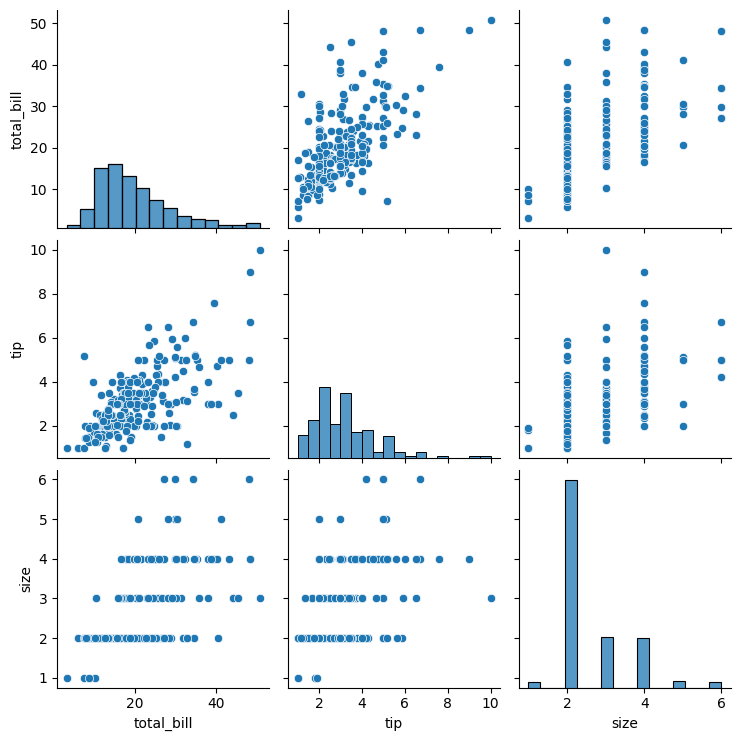

In [26]:
# only for numerical variables
sns.pairplot(tips)

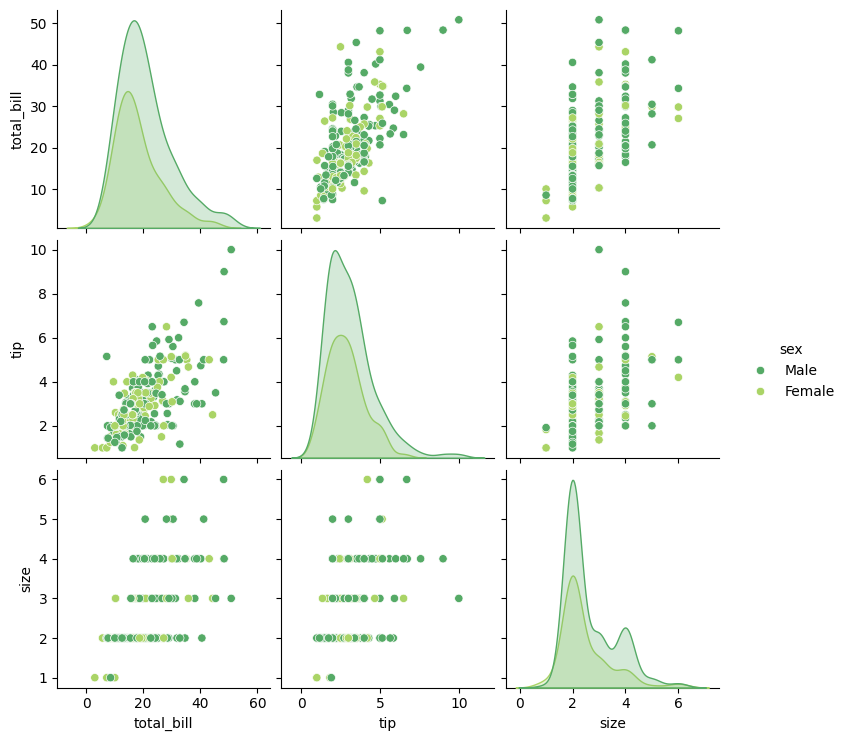

In [29]:
# only for numerical variables
# in 'hue' is pass a categorical variable
sns.pairplot(tips,hue='sex',palette='summer')

#### rug plots

<Axes: xlabel='total_bill'>

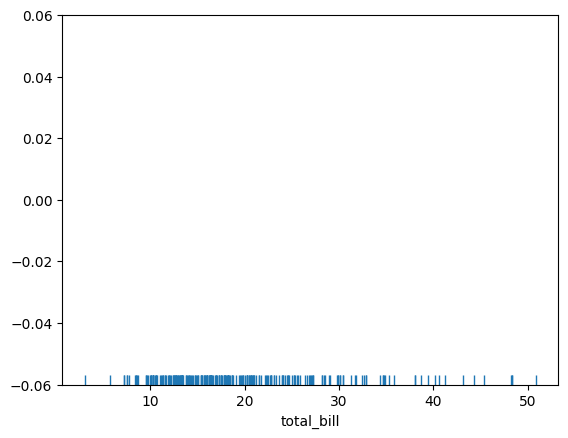

In [ ]:
# similar to a histogram 
sns.rugplot(tips['total_bill'])

<Axes: xlabel='total_bill', ylabel='Count'>

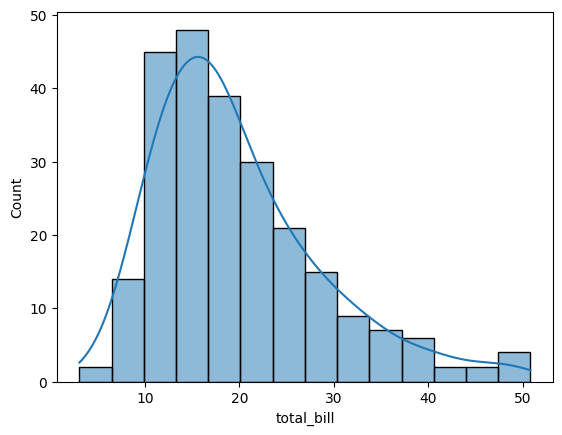

In [34]:
sns.histplot(tips['total_bill'],kde=True)

we can see that the rug plot follows the distribution of the kde(kernel density estimation plot) drawn over the hist plot

#### kdeplot

(0.0, 1.0)

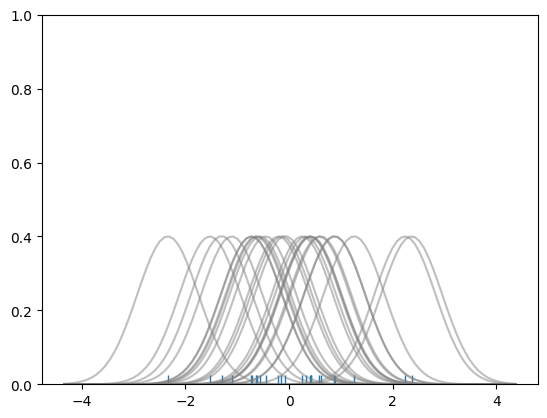

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# create dataset
dataset = np.random.randn(25)

# create another rugplot
sns.rugplot(dataset);

# set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# create an empty kernel list
kernel_list = []

# plot each basis function
for data_point in dataset:
    
    # create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

normal distributions centered around the blue dashes
by summing them all up we are going to get the kernel density basis funtion 

Text(0.5, 0.98, 'Sum of the Basis Functions')

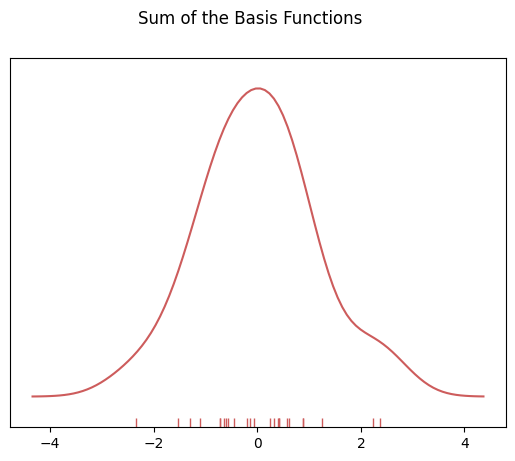

In [38]:
# to get the kde plot we can sum these basis functions.

# plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# get rid of y-tick marks
plt.yticks([])

# set title
plt.suptitle("Sum of the Basis Functions")

we obtained in that way the kde